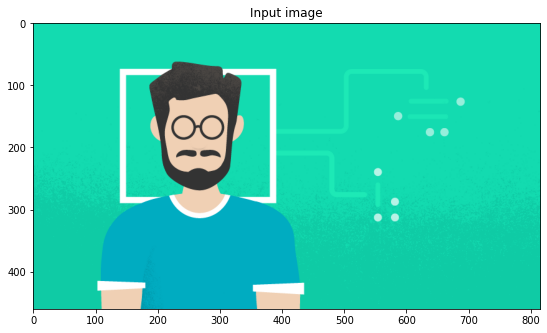

In [10]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter

GaborKernel_0 = [
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ],
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],
    [ 0.000921261, 0.006375831, -0.174308068, -0.067914552, 1.000000000, -0.067914552, -0.174308068, 0.006375831, 0.000921261 ],
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ]
]
GaborKernel_45 = [
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05,  0.000744712,  0.000132863, -9.04408E-06, -1.01551E-06 ],
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700,  0.000389916,  0.003516954,  0.000288732, -9.04408E-06 ],
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072,  0.000847346,  0.003516954,  0.000132863 ],
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072,  0.000389916,  0.000744712 ],
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000,  0.249959607, -0.139178011, -0.022947700,  3.79931E-05 ],
    [  0.000744712,  0.003899160, -0.108372072, -0.302454279,  0.249959607,  0.460162150,  0.052928748, -0.013561362, -0.001028923 ],
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011,  0.052928748,  0.044837725,  0.002373205, -0.000279806 ],
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362,  0.002373205,  0.000925120,  2.25320E-05 ],
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806,  2.25320E-05,  4.04180E-06 ]
]
GaborKernel_90 = [
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ],
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],
    [  0.002010422,  0.030415784,  0.211749204,  0.678352526,  1.000000000,  0.678352526,  0.211749204,  0.030415784,  0.002010422 ],
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ]
]
GaborKernel_135 = [
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806, 2.2532E-05, 4.0418E-06 ],
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362, 0.002373205, 0.00092512, 2.2532E-05 ],
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011, 0.052928748, 0.044837725, 0.002373205, -0.000279806 ],
    [  0.000744712,  0.000389916, -0.108372072, -0.302454279,  0.249959607, 0.46016215, 0.052928748, -0.013561362, -0.001028923 ],
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000, 0.249959607, -0.139178011, -0.0229477, 3.79931E-05 ],
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072, 0.000389916, 0.000744712 ],
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072, 0.000847346, 0.003516954, 0.000132863 ],
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700, 0.000389916, 0.003516954, 0.000288732, -9.04408E-06 ],
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05 , 0.000744712, 0.000132863, -9.04408E-06, -1.01551E-06 ]
]

# Intensity = (r + g + b) / 3
# angle = [0, 45, 90, 135]
# for i in angle:
#     g_kernel = cv2.getGaborKernel((21, 21), 8.0, i, 10.0, 0.5, 0, ktype=cv2.CV_32F)
#     Orientation[i] = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)

#Orientation = {}

def ExtractRGBI(inputImage):
    # convert scale of array elements
    # 转换数组元素的比例
    src = np.float32(inputImage) * 1./255
    # split
    # 分裂
    (b, g, r) = cv2.split(src)
    # extract an intensity image提取强度图像
    I = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


    # return
    return r,g,b,I

def CreateGaussianPyr(src):#CreateGaussianPyramid 构建高斯金字塔
    dst = list()
    dst.append(src)
    for i in range(1,9):
        nowdst = cv2.pyrDown(dst[i-1])
        dst.append(nowdst)
    return dst
def NormalizedNewColorsChannels(b, g, r, I):
    #
    # treshold = I.max() / 10.
    # mask = I > treshold
    #
    # norm_b = (b*mask) / (I + 0.00001)
    # norm_g = (g*mask) / (I + 0.00001)
    # norm_r = (r*mask) / (I + 0.00001)

    R = r - (g + b)/2
    G = g - (r + b)/2
    B = b - (g + r)/2
    Y = (r + g)/2 - np.abs(r - g)/2 - b
    #
    # R[R < 0] = 0
    # G[G < 0] = 0
    # B[B < 0] = 0
    # Y[Y < 0] = 0

    return R, G, B, Y

def CenterSurroundDiff(GaussianMap):#CSD Center surround different中心环绕不同

    dist = list()

    for i in range(2, 5):
        size = GaussianMap[i].shape
        size = (size[1], size[0])

        tmp = cv2.resize(GaussianMap[i + 3], size, interpolation = cv2.INTER_LINEAR)
        diff = cv2.absdiff(GaussianMap[i], tmp)
        dist.append(diff)

        tmp = cv2.resize(GaussianMap[i + 4], size, interpolation = cv2.INTER_LINEAR)
        diff = cv2.absdiff(GaussianMap[i], tmp)
        dist.append(diff)


    return dist

def IntensityFM(I):#Intensity feature map强度特征图

    I_pyr = CreateGaussianPyr(I)

    return CenterSurroundDiff(I_pyr)

def ColorFM(R, G, B, Y):#Color feature map颜色特征图

    R_pyr = CreateGaussianPyr(R)
    G_pyr = CreateGaussianPyr(G)
    B_pyr = CreateGaussianPyr(B)
    Y_pyr = CreateGaussianPyr(Y)
    RG_FM = list()
    BY_FM = list()
    for i in range(2, 5):
        RG = R_pyr[i] - G_pyr[i]
        size = RG.shape
        size = (size[1], size[0])
        tmp1 = cv2.resize(G_pyr[i + 3], size, interpolation = cv2.INTER_LINEAR)
        tmp2 = cv2.resize(R_pyr[i + 3], size, interpolation = cv2.INTER_LINEAR)
        tmp3 = tmp1 - tmp2
        diff = cv2.absdiff(RG, tmp3)
        RG_FM.append(diff)
        tmp1 = cv2.resize(G_pyr[i + 4], size, interpolation = cv2.INTER_LINEAR)
        tmp2 = cv2.resize(R_pyr[i + 4], size, interpolation = cv2.INTER_LINEAR)
        tmp3 = tmp1 - tmp2
        diff = cv2.absdiff(RG, tmp3)
        RG_FM.append(diff)
        BY = B_pyr[i] - Y_pyr[i]
        size = BY.shape
        size = (size[1], size[0])
        tmp1 = cv2.resize(Y_pyr[i + 3], size, interpolation = cv2.INTER_LINEAR)
        tmp2 = cv2.resize(B_pyr[i + 3], size, interpolation = cv2.INTER_LINEAR)
        tmp3 = tmp1 - tmp2
        diff = cv2.absdiff(BY, tmp3)
        BY_FM.append(diff)
        tmp1 = cv2.resize(Y_pyr[i + 4], size, interpolation = cv2.INTER_LINEAR)
        tmp2 = cv2.resize(B_pyr[i + 3], size, interpolation = cv2.INTER_LINEAR)
        tmp3 = tmp1 - tmp2
        diff = cv2.absdiff(BY, tmp3)
        BY_FM.append(diff)
    return RG_FM, BY_FM

def OrientationFM(src):#Orientation feature map方向特征图

    # creating a Gaussian pyramid创建一个高斯金字塔
    GaussianI = CreateGaussianPyr(src)
    # convoluting a Gabor filter with an intensity image to extract orientation features
    # 用强度图像对Gabor滤波器进行卷积以提取方向特征
    GaborOutput0   = [ np.empty((1,1)), np.empty((1,1)) ]  # dummy data: any kinds of np.array()s are OK
    GaborOutput45  = [ np.empty((1,1)), np.empty((1,1)) ]   #虚拟数据：任何类型的np.array（）都可以
    GaborOutput90  = [ np.empty((1,1)), np.empty((1,1)) ]
    GaborOutput135 = [ np.empty((1,1)), np.empty((1,1)) ]
    for j in range(1,8):
        GaborOutput0.append(   cv2.filter2D(GaussianI[j], cv2.CV_32F, np.array(GaborKernel_0)) )
        GaborOutput45.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, np.array(GaborKernel_45)) )
        GaborOutput90.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, np.array(GaborKernel_90)) )
        GaborOutput135.append( cv2.filter2D(GaussianI[j], cv2.CV_32F, np.array(GaborKernel_135)) )
    # calculating center-surround differences for every orientation
    # 计算每个方向的中心-周围差异
    CSD0   = CenterSurroundDiff(GaborOutput0)
    CSD45  = CenterSurroundDiff(GaborOutput45)
    CSD90  = CenterSurroundDiff(GaborOutput90)
    CSD135 = CenterSurroundDiff(GaborOutput135)
    # concatenate
    dst = list(CSD0)
    dst.extend(CSD45)
    dst.extend(CSD90)
    dst.extend(CSD135)
    # return

    return dst

def N(feature_map):

    M = 8#range

    norm = ((feature_map - feature_map.min()) / (feature_map.max() - feature_map.min() + 0.0001)) * M
    #     minn, maxx, dummy1, dummy2 = cv2.minMaxLoc(feature_map)

    #     if maxx!=minn:
    #         norm = ( feature_map/(maxx-minn) + minn/(minn-maxx) ) * M
    #     else:
    #         norm = ( feature_map - minn ) * M

    width = feature_map.shape[1]
    height = feature_map.shape[0]

    maxima = maximum_filter(norm, size=10)
    maxima = (norm == maxima)
    mnum = maxima.sum()

    maxima = np.multiply(maxima, norm)
    mbar = float(maxima.sum() / mnum)

    return norm * (M - mbar)**2

def NormalizedIntensityFeaturesMaps(feature_map, img):


    commonWidth = int(img.shape[0])
    commonHeight = int(img.shape[1])
    commonSize = commonWidth, commonHeight

    norm = list()
    for i in range(0,len(feature_map)):
        normalizedImage = N(feature_map[i])
        temp = cv2.resize(normalizedImage, commonSize)
        norm.append(temp)

    return sum(norm)

def NormalizedColorFeaturesMaps(feature_map_RG, feature_map_BY, img):


    commonWidth = int(img.shape[0])
    commonHeight = int(img.shape[1] )
    commonSize = commonWidth, commonHeight

    norm_map_RG = cv2.resize(N(feature_map_RG[0]), commonSize)
    norm_map_BY = cv2.resize(N(feature_map_BY[0]), commonSize)
    norm_map = cv2.add(norm_map_RG, norm_map_BY)

    for i in range(1, len(feature_map_RG)):
        norm_RG = N(feature_map_RG[i])
        norm_BY = N(feature_map_BY[i])
        norm = cv2.add(norm_RG, norm_BY)
        resized_map = cv2.resize(norm, commonSize)
        norm_map = cv2.add(norm_map, resized_map)

    return norm_map

def NormalizedOrientationFeaturesMaps(feature_map, img):


    commonWidth = int(img.shape[0])
    commonHeight = int(img.shape[1])
    commonSize = commonWidth, commonHeight
    tot = list()

    for theta in range(0, 24, 6):
        norm_map = cv2.resize(N(feature_map[theta]), commonSize)
        for i in range(0, 5):
            norm = N(feature_map[theta + (i+1)])
            resized_map = cv2.resize(norm, commonSize)
            norm_map_tmp = cv2.add(norm_map, resized_map)
        norm_map = cv2.add(norm_map_tmp, norm_map)
        norm_map = N(norm_map)
        tot.append(norm_map)

    return sum(tot)


def DoAll(img):

    b, g, r, I = ExtractRGBI(img)
    R, G, B, Y = NormalizedNewColorsChannels(b, g, r, I)

    I_FM = IntensityFM(I)
    RG_FM, BY_FM = ColorFM(R, G, B, Y)
    O_FM = OrientationFM(I)

    Intensity = NormalizedIntensityFeaturesMaps(I_FM, img)
    Intensity = N(Intensity)

    Color = NormalizedColorFeaturesMaps(RG_FM, BY_FM, img)
    Color = N(Color)

    Orientation = NormalizedOrientationFeaturesMaps(O_FM, img)
    Orientation = N(Orientation)

    Saliency = (Color + Intensity + Orientation) / 3.0
    Saliency = cv2.resize(Saliency, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_LINEAR)

    return Saliency, Intensity, Color, Orientation



def CreateBoundingBox(Saliency, N):

    Saliency_copy = Saliency.copy()
    Marked = Saliency.copy()
    r = Marked
    g = Marked
    b = Marked

    Marked = cv2.merge((b,g,r)).astype('uint8')

    for i in range(0, N):

        maxima = maximum_filter(Saliency_copy, size=(20,20))
        maxx = np.where(maxima == maxima.max())



        cv2.rectangle(Marked, (maxx[1][0]-50, maxx[0][0]-50), (maxx[1][0]+50, maxx[0][0]+50), (0, 255, 0), 2)
        cv2.rectangle(Saliency_copy, (maxx[1][i]-25, maxx[0][i]-25), (maxx[1][i]+25, maxx[0][i]+25), (0, 0, 0), cv2.FILLED)


    return Marked



if __name__ == '__main__':

    path = 'human.jpg'
    img = cv2.imread(path)

    Saliency, Intensity, Color, Orientation = DoAll(img)
    BoundingBox = CreateBoundingBox(Saliency, 10)

    fig = plt.figure(figsize=(20, 20))

    plt.subplot(3,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input image')

Text(0.5, 1.0, 'Color image')

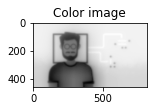

In [11]:
plt.subplot(3,2,2), plt.imshow(cv2.resize(Color, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_LINEAR), 'gray')
plt.title('Color image')

Text(0.5, 1.0, 'Intensity map')

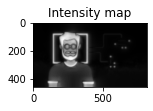

In [12]:
plt.subplot(3,2,3), plt.imshow(cv2.resize(Intensity, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_LINEAR), 'gray')
plt.title('Intensity map')

Text(0.5, 1.0, 'Orientation map')

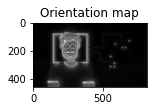

In [13]:
plt.subplot(3,2,4), plt.imshow(cv2.resize(Orientation, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_LINEAR), 'gray')
plt.title('Orientation map')

Text(0.5, 1.0, 'Saliency map')

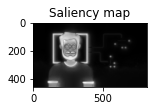

In [14]:
plt.subplot(3, 2, 5), plt.imshow(Saliency, 'gray')
plt.title('Saliency map')

Text(0.5, 1.0, 'Saliency map')

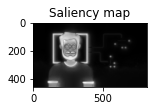

In [17]:
plt.subplot(3, 2, 5), plt.imshow(Saliency, 'gray')
plt.title('Saliency map')

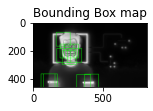

In [16]:
BoundingBox = cv2.resize(BoundingBox, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_LINEAR)
plt.subplot(3,2,6), plt.imshow(cv2.cvtColor(BoundingBox, cv2.COLOR_BGR2RGB), 'gray')
plt.title('Bounding Box map')
plt.show()